In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thyroid_data = pd.read_csv('datasets/thyroid_data.csv')
print(thyroid_data.columns)

Index(['T3_resin ', 'serum_thyrpxin', 'serum_triiodothyronine', 'basal_TSH',
       'abs_diff_TSH', 'lables'],
      dtype='object')


In [3]:
thyroid_data.shape

(215, 6)

In [4]:
thyroid_data.head()

,T3_resin,serum_thyrpxin,serum_triiodothyronine,basal_TSH,abs_diff_TSH,lables
0,107,10.1,2.2,0.9,2.7,1
1,113,9.9,3.1,2.0,5.9,1
2,127,12.9,2.4,1.4,0.6,1
3,109,5.3,1.6,1.4,1.5,1
4,105,7.3,1.5,1.5,-0.1,1


In [5]:
thyroid_data.groupby('lables').size()

lables
1    150
2     35
3     30
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008DCF981240>,
      dtype=object)

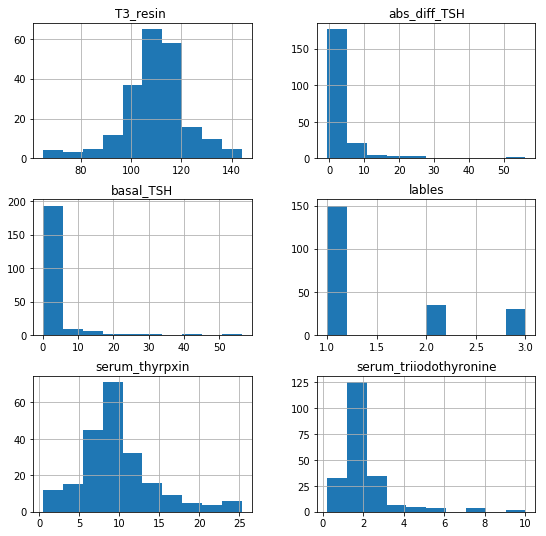

In [6]:
thyroid_data.hist(figsize=(9, 9))

In [7]:
thyroid_data.isnull().sum()

T3_resin                  0
serum_thyrpxin            0
serum_triiodothyronine    0
basal_TSH                 0
abs_diff_TSH              0
lables                    0
dtype: int64

In [9]:
thyroid_data.isna().sum()

T3_resin                  0
serum_thyrpxin            0
serum_triiodothyronine    0
basal_TSH                 0
abs_diff_TSH              0
lables                    0
dtype: int64